In [0]:
# Recurrent Neural Network



# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('75Percent_train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 56513):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 350, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 350, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 350, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 350))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 4, batch_size = 32)



Epoch 1/4
56453/56453 [==============================] - 3323s 59ms/step - loss: 0.0019
Epoch 2/4
56453/56453 [==============================] - 3255s 58ms/step - loss: 2.4850e-04
Epoch 3/4
56453/56453 [==============================] - 3127s 55ms/step - loss: 2.2072e-04
Epoch 4/4
56453/56453 [==============================] - 2940s 52ms/step - loss: 1.9558e-04


In [0]:

# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('75Percent_test.csv')
real_test_dataset = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Absolute_Residuen_mit_NN_BWF'], dataset_test['Absolute_Residuen_mit_NN_BWF']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 18838):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_data = regressor.predict(X_test)
predicted_data = sc.inverse_transform(predicted_data)

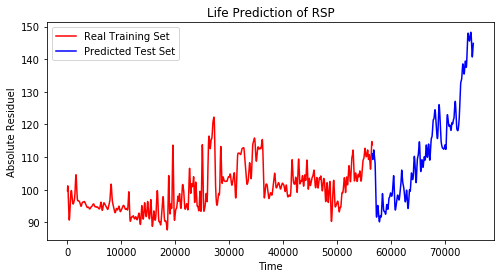

In [0]:
# Visualising the results
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(training_set, color = 'red', label = 'Real Training Set')
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predicted_data)),predicted_data, color = 'blue', label = 'Predicted Test Set')
plt.title('Life Prediction of RSP')
plt.xlabel('Time')
plt.ylabel('Absolute Residuel')
plt.legend()
plt.show()

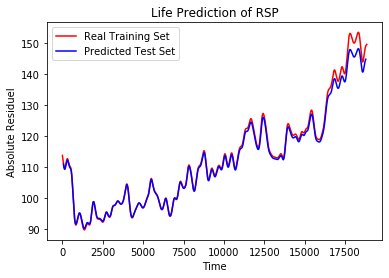

In [0]:
# Visualising the results
plt.plot(real_test_dataset, color = 'red', label = 'Real Training Set')
plt.plot(predicted_data, color = 'blue', label = 'Predicted Test Set')
plt.title('Life Prediction of RSP')
plt.xlabel('Time')
plt.ylabel('Absolute Residuel')
plt.legend()
plt.show()